# Prerequisites


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Load dataset

In [3]:
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Missing value analysis

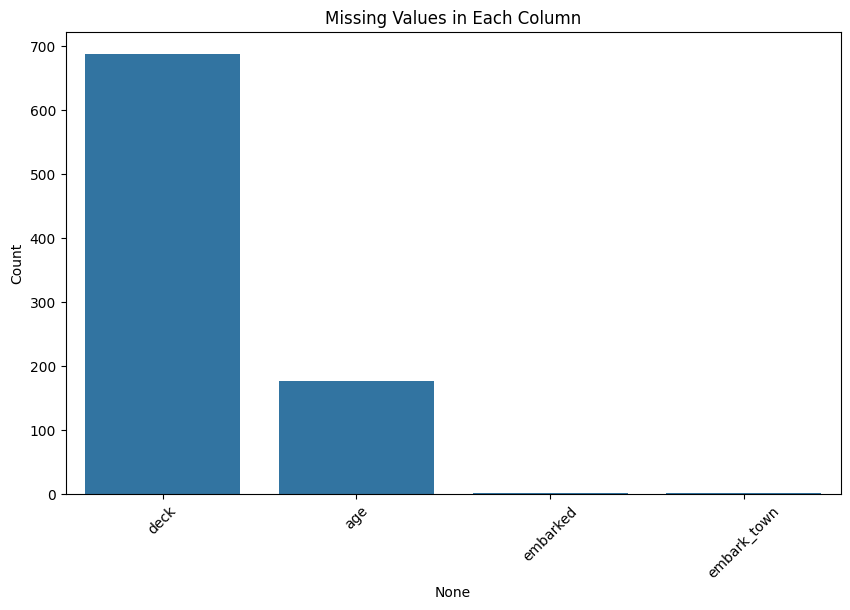

In [4]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# plot 
plt.figure(figsize=(10, 6))
sns.barplot(x=missing.index, y=missing.values)
plt.title("Missing Values in Each Column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Univariate Analysis


Numerical Features

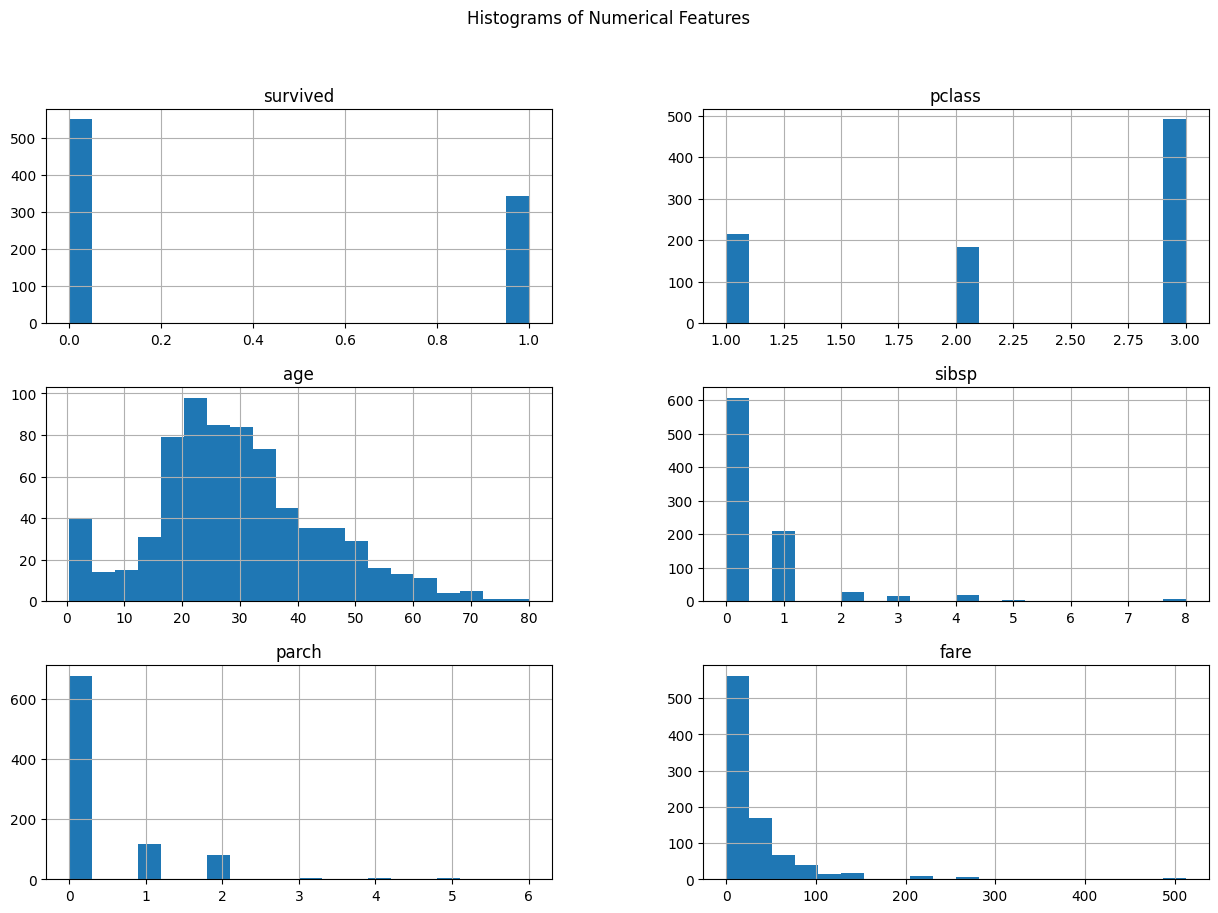

In [5]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns


df[num_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

Categorical Features

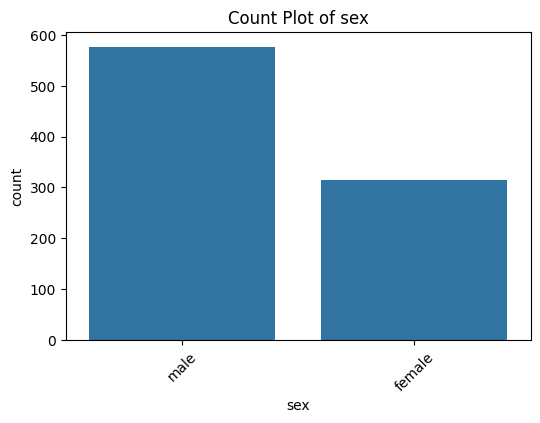

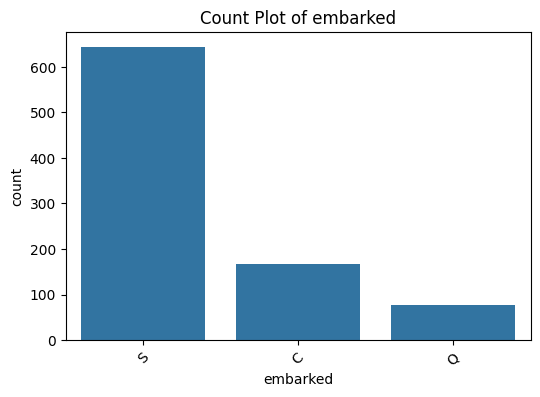

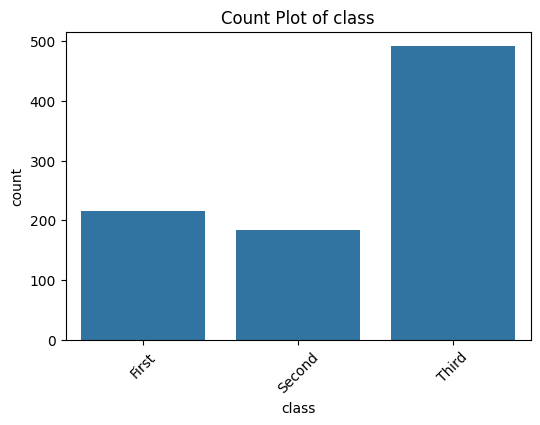

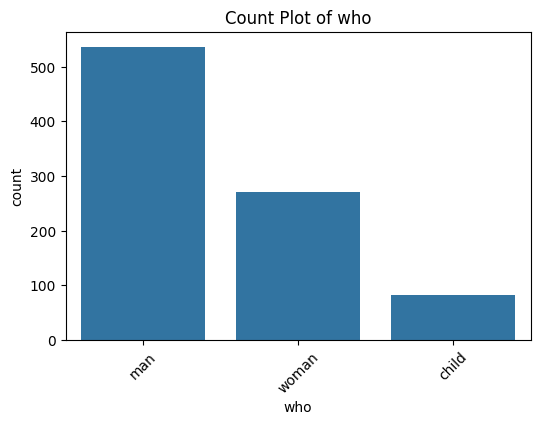

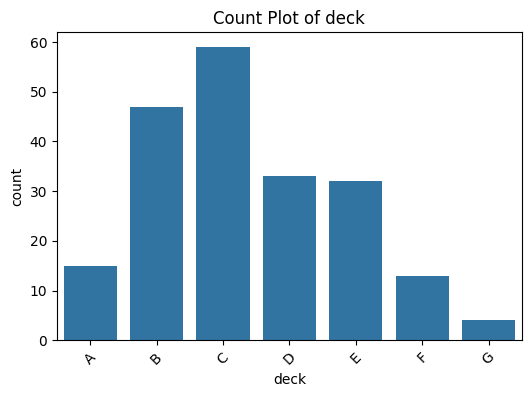

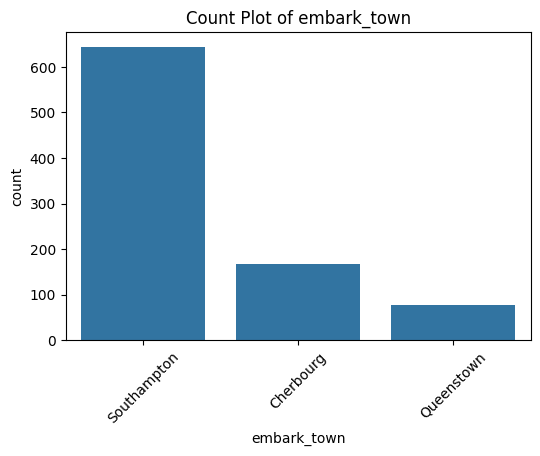

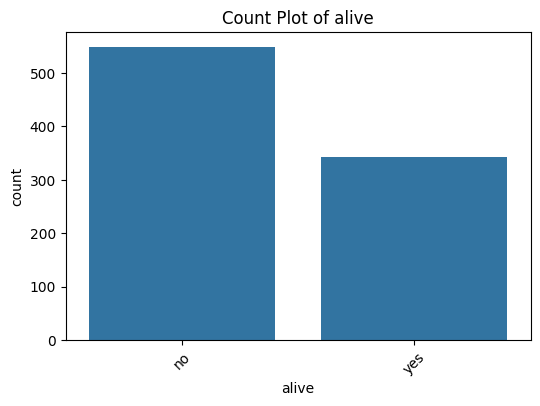

In [6]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Bar plots
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Outlier Detection with Box Plots

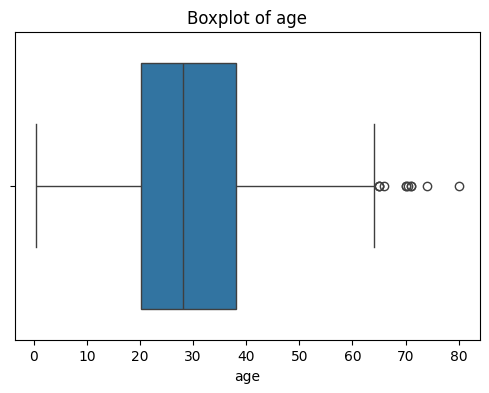

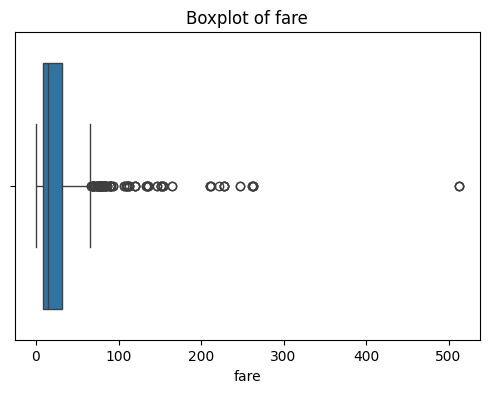

In [7]:
for col in ['age', 'fare']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Bivariate Analysis

Survival by Sex, Class, and Embarkation


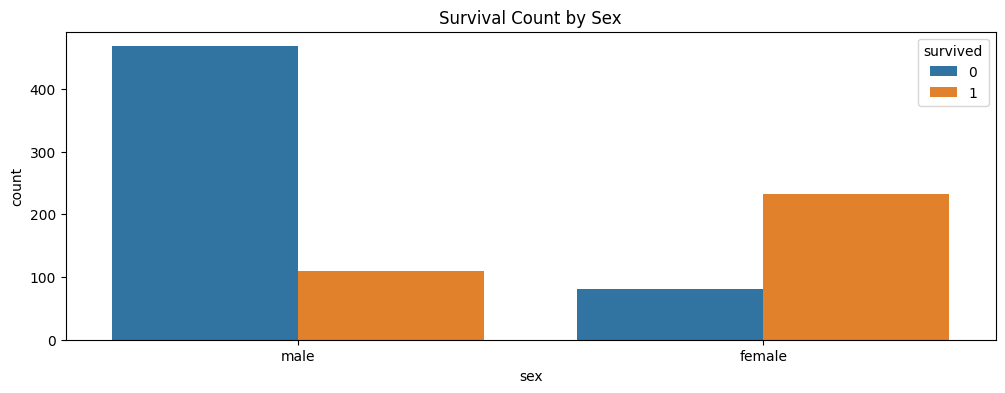

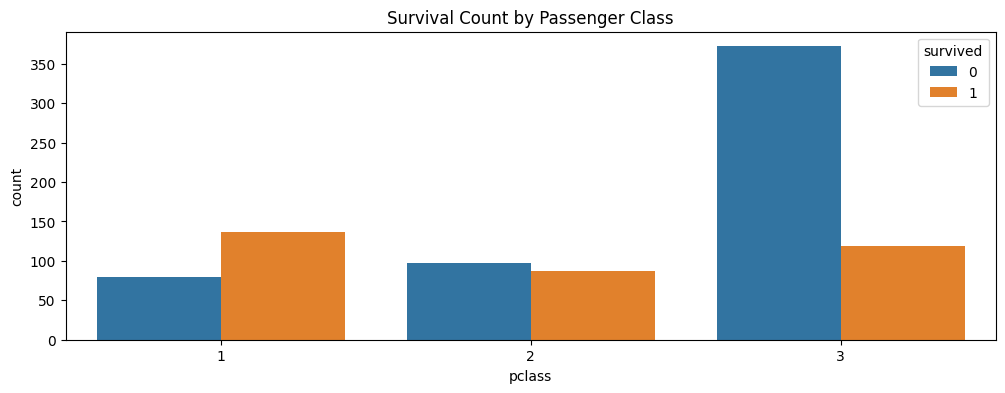

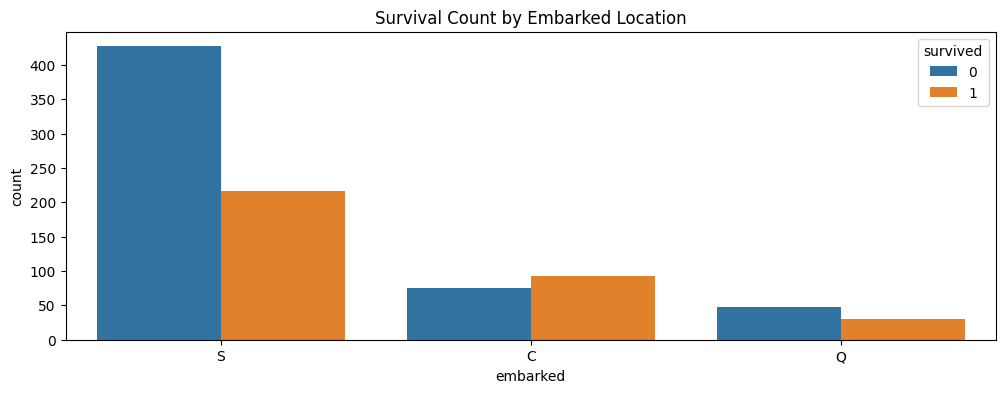

In [8]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='sex', hue='survived')
plt.title("Survival Count by Sex")
plt.show()

plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='pclass', hue='survived')
plt.title("Survival Count by Passenger Class")
plt.show()

plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='embarked', hue='survived')
plt.title("Survival Count by Embarked Location")
plt.show()

# Correlation Matrix

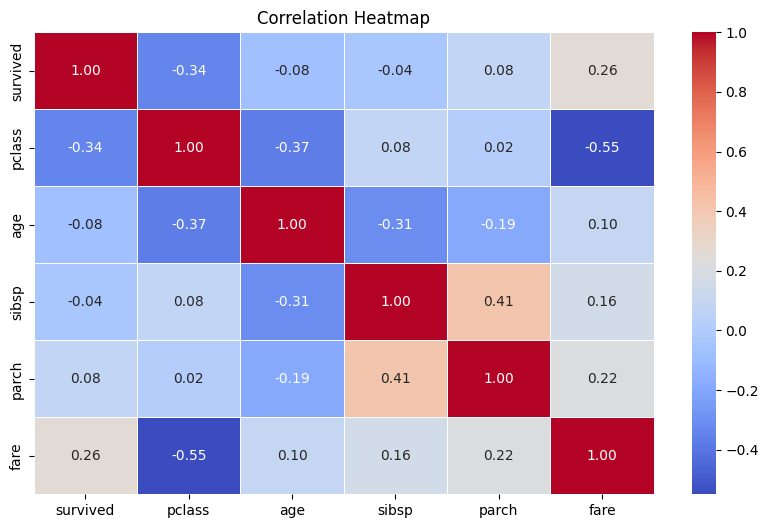

In [10]:
# Only numeric columns
corr_matrix = df.select_dtypes(include=[np.number]).corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


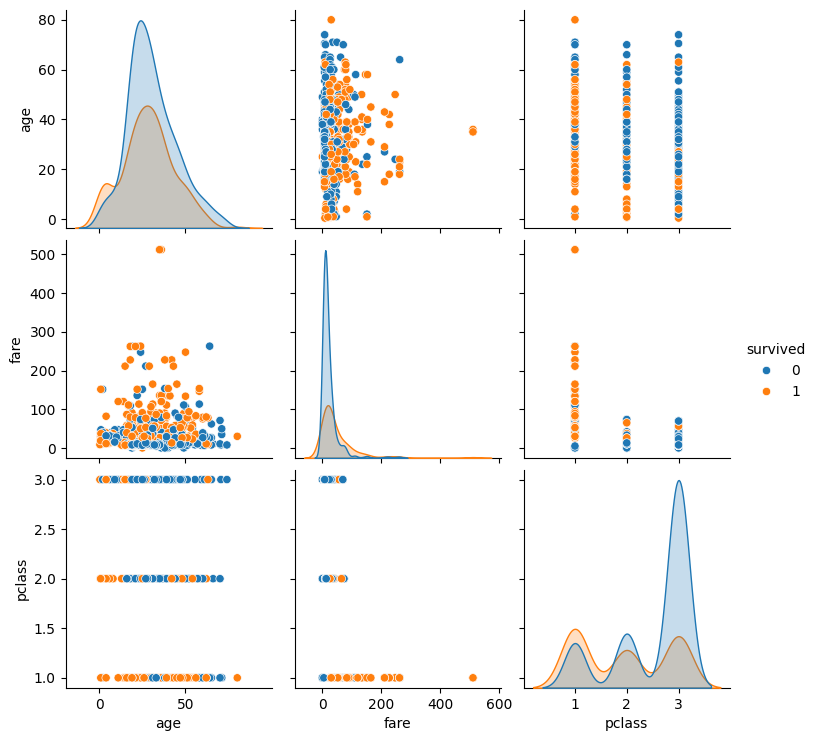

In [11]:
sns.pairplot(df[['survived', 'age', 'fare', 'pclass']], hue='survived')
plt.show()